# Classification with Neural Networks and Logistic Regression

In [1]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import sklearn.linear_model as sk
from sklearn.preprocessing import StandardScaler

# Import self-made modules
from project2_code import LogisticRegression, accuracy, NeuralNetwork

### Load breast cancer data and prepare data

In [2]:
data = load_breast_cancer()
X = data['data']
y = data['target']

# Split data in train, validation and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Train Neural Network for Classification

In [17]:
network = NeuralNetwork(X_train_scaled.shape[1], regr_or_class='class')        
network.add_layer(10)
network.add_layer(1)
network.train(X_train_scaled, y_train, minibatches=10, num_epochs = 1000, learning_rate=0.01, return_loss=True, loss='accuracy', data_val=X_val_scaled, target_val=y_val)

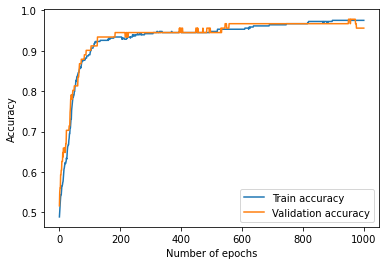

In [18]:
plt.plot(range(1000), network.loss_train, label='Train accuracy')
plt.plot(range(1000), network.loss_val, label='Validation accuracy')
plt.xlabel('Number of epochs');
plt.ylabel('Accuracy')
plt.legend();

## Use Logistic Regression for Classification

In [25]:
lr = LogisticRegression(solver='SGD', learning_rate=0.1, epochs=100)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_train_scaled)
accuracy(np.array(y_pred), y_train)

TypeError: __init__() got an unexpected keyword argument 'epochs'

In [6]:
lr_sk = sk.LogisticRegression(penalty='none', solver='sag')
lr_sk.fit(X_train_scaled, y_train)
lr_sk.score(X_train_scaled, y_train)

C:\Users\odala\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.9945054945054945